The data from this project was retrieved from the website mavenanalytics.io. The data consist of all space missions from 1957 to August 2022 and includes the details on the location, date, time, the result of the launch. This data also includes the company responsible, the name, the price, and the status of the rocket used for the mission. 

In this project, I will demonstrate how to utilize pandas to import the neccessary libraries for performing analysis and reading in the data to a dataframe. I will then clean the data checking for duplicate, unique and null values, as well as extracting the month and day from the date column and extracting the hour from the time column to assing those values their own columns utilizing pandas datetime function. After that is complete, I will perform exploratory data analysis to check for trends and patterns within the data. Finally I will visualize my findings and the answer to the given questions utilizing matplotlib and seaborn.

### Questions: 
1) How have rocket launcehs trended across time?
2) Has mission success rate increased?
3) Which countries have had the most successful space missions?
4) Which rocket has been used for the most space missions?
5) Is it still active?

###### Importing libraries and setting desired options

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import os

I will need to check my file system to locate the file that will be used for this project.

First, I will look at my current working directory.

In [3]:
os.getcwd()

'c:\\Users\\mjaso\\OneDrive'

Since this is not the location that I am looking for, I will change directories.

In [4]:
os.chdir("c:\\Users\\mjaso")

Now I will list all directories to search for the one in need.

In [5]:
os.listdir("c:\\Users\\mjaso")

['.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.idlerc',
 '.ipython',
 '.matplotlib',
 '.vscode',
 'anaconda3',
 'AppData',
 'Application Data',
 'ChiCrimeExploratoryAnalysis.ipynb',
 'cone_volume.py',
 'Contacts',
 'Cookies',
 'DataDaftPythonforDataAnalysis.py',
 'Documents',
 'Downloads',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'numpy_pandas_csv.py',
 'object_oriented_programming.py',
 'OneDrive',
 'PrintHood',
 'PycharmProjects',
 'PyConditionalsPractice.py',
 'Recent',
 'Saved Games',
 'seaborn-data',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'test.py',
 'Titani

Now that I've found the desired directory, I will access to that directory.

In [6]:
os.chdir("c:\\Users\\mjaso\\Downloads")

Now in the desired directory, I will view all files there.

In [7]:
os.listdir("c:\\Users\\mjaso\\Downloads")

['1CatA2d3QAqmrQNndzAKQg_420b4adfcdec47a0b0c67d6c5cea0641_Cosmetics-Inc..xlsx',
 '2015_Street_Tree_Census_-_Tree_Data.csv',
 '4sw1armBTSyMNWq5ga0sSg_766c88d8ce0649b4b84154bc10632af1_Party-Plan-Spreadsheet.xlsx',
 '6JtOPlo_TIabTj5aP1yGkA_902b63ca5cb74b4c99c6ea9a05fb84f1_Movie-Data-Starter-Project---Format-as-Currency.xlsx',
 '7z2301-x64.exe',
 '7z2401-x64.exe',
 'AccessDatabaseEngine (1).exe',
 'AccessDatabaseEngine (2).exe',
 'AccessDatabaseEngine (3).exe',
 'accessdatabaseengine.exe',
 'AccessDatabaseEngine_X64 (1).exe',
 'accessdatabaseengine_X64 (2).exe',
 'accessdatabaseengine_X64.exe',
 'AdventureWorks-oltp-install-script',
 'AdventureWorks-oltp-install-script.zip',
 'AdventureWorksDW-data-warehouse-install-script',
 'AdventureWorksDW-data-warehouse-install-script.zip',
 'Anaconda3-2022.10-Windows-x86_64.exe',
 'archive (1).zip',
 'archive (2).zip',
 'archive (3).zip',
 'archive (4)',
 'archive (4).zip',
 'archive (5)',
 'archive (5).zip',
 'archive.zip',
 'AtomSetup-x64.exe',
 'B

Now that I have found my folder in that directory, I will change to that directory.

In [8]:
os.chdir("c:\\Users\\mjaso\\Downloads\\Space+Missions_Project")

Now I will search for my desired file in that directory.

In [9]:
os.listdir("c:\\Users\\mjaso\\Downloads\\Space+Missions_Project")

['space_missions.csv', 'space_missions_data_dictionary.csv']

Great. Now that I have found my file for this project, I will load it into a dataframe utilizing pandas.

In [10]:
space_missions = pd.read_csv(r"c:\Users\\mjaso\\Downloads\\Space+Missions_Project\\space_missions.csv", encoding="latin1")

I will check how many rows and columns are in this dataset.

In [11]:
print(f"There are {space_missions.shape[0]} rows and {space_missions.shape[1]} columns of data in this dataframe.")

There are 4630 rows and 9 columns of data in this dataframe.


I'm going to check the first and last 5 rows of data, checking for consistencies or inconsistencies to insure that all data has been loaded without errors.

In [12]:
space_missions.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [13]:
space_missions.tail()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success


Now I will look at the datatypes to make sure they are correct.

In [14]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


Since my 'Date', and 'Time' columns are not in the proper formats, I will use pandas to convert those columns to their respective dtypes.

In [15]:
space_missions["Date"] = pd.to_datetime(space_missions["Date"])
space_missions["Time"] = pd.to_datetime(space_missions["Time"])

Now that those columns have been updated to the correct datatypes, I will also extract the year, month, day, and the hour from those columns to use in my analysis.

In [16]:
space_missions["Year"] = space_missions["Date"].dt.year
space_missions["Month"] = space_missions["Date"].dt.month
space_missions["Day"] = space_missions["Date"].dt.day
space_missions["Hour"] = space_missions["Time"].dt.hour

Perfect, now I will verify that the changes have been made.

In [17]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   datetime64[ns]
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   object        
 8   MissionStatus  4630 non-null   object        
 9   Year           4630 non-null   int64         
 10  Month          4630 non-null   int64         
 11  Day            4630 non-null   int64         
 12  Hour           4503 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 470.4+ KB


Now I will check for any duplicated rows of data.

In [18]:
duplicated_rows = space_missions.duplicated().sum()
print(f"There are {duplicated_rows} rows of duplicated data in this dataframe.")

There are 1 rows of duplicated data in this dataframe.


I will drop that duplicated row from the dataframe.

In [19]:
space_missions.drop_duplicates(inplace=True)

Now let me check for duplicates again to verify the dropping of that row.

In [20]:
duplicate_rows = space_missions.duplicated().sum()
print(f"There are now {duplicate_rows} of duplicated data in this dataframe.")

There are now 0 of duplicated data in this dataframe.


Ok, all duplicates have been removed. Now lets explore any null values.

In [21]:
for na in space_missions.columns:
    nulls = space_missions[na].isnull().sum()
    print(f"There are {nulls} N/A values in the column {na}.")

There are 0 N/A values in the column Company.
There are 0 N/A values in the column Location.
There are 0 N/A values in the column Date.
There are 127 N/A values in the column Time.
There are 0 N/A values in the column Rocket.
There are 0 N/A values in the column Mission.
There are 0 N/A values in the column RocketStatus.
There are 3365 N/A values in the column Price.
There are 0 N/A values in the column MissionStatus.
There are 0 N/A values in the column Year.
There are 0 N/A values in the column Month.
There are 0 N/A values in the column Day.
There are 127 N/A values in the column Hour.


There are some N/A values in the 'Time' column which correspond with the N/A values in the 'Hour' column. Also, there are quite a few N/A values in the 'Price' column. However, the N/A values in the 'Price' column are not important because our analysis does not involve price. I will decide what to do with the N/A values later.

Now I will explore how many unique values that are in each column. 

In [22]:
for u in space_missions.columns:
    nque = space_missions[u].nunique()
    print(f"The {u} column has {nque} unique values.")

The Company column has 62 unique values.
The Location column has 158 unique values.
The Date column has 4180 unique values.
The Time column has 1300 unique values.
The Rocket column has 370 unique values.
The Mission column has 4556 unique values.
The RocketStatus column has 2 unique values.
The Price column has 65 unique values.
The MissionStatus column has 4 unique values.
The Year column has 66 unique values.
The Month column has 12 unique values.
The Day column has 31 unique values.
The Hour column has 24 unique values.


Great, this information looks good and makes logical sense.

Now I will explore some statistical information on all of the categorical columns in the dataframe. 

In [23]:
space_missions.describe(include="object")

,Company,Location,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4629,4629,4629,4629,4629,1264,4629
unique,62,158,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,446,8,3620,136,4161


Ok, now I will move on to answering the the desired questions.

1) How have rocket launches trended across time?

###### Rocket Launches by Year

In [24]:
rl_trend_year = space_missions.groupby("Year")["Company"].count().reset_index()
rl_trend_year.rename(columns={"Year": "Launch Year", "Company": "Total Launches"}, inplace=True)
rl_trend_year

,Launch Year,Total Launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
5,1962,82
6,1963,41
7,1964,60
8,1965,87
9,1966,101


The data indicates that from 1957 to 1977, the number of launches were overall increasing by year. From 1978 to 2015 the number of overall launches decreased significantly by year. While the years 2016 to 2022 displayed an overall increase in launches by year. Now I will look at the number of rocket launches by month.

Now I will look at, ,and create a visual for the top 10 years that had the most amount of launches.

In [25]:
rl_trend_year[["Total Launches", "Launch Year"]].sort_values(by="Total Launches", ascending=False)[:10].reset_index()

,index,Total Launches,Launch Year
0,64,157,2021
1,63,119,2020
2,14,119,1971
3,61,117,2018
4,20,114,1977
5,19,113,1976
6,18,113,1975
7,62,109,2019
8,13,107,1970
9,10,106,1967


Bar graph visualization of top 10 most launches by year!


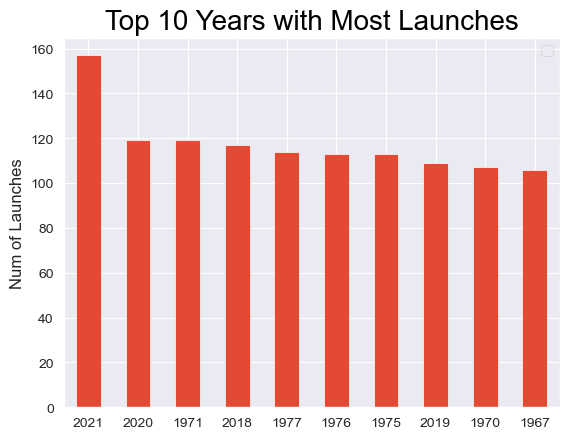

In [26]:
rl_trend_year.sort_values(by="Total Launches",
                          ascending=False)[:10].plot(kind="bar",
                                                     y="Total Launches",
                                                     x="Launch Year",
                                                     rot=0)
plt.title("Top 10 Years with Most Launches",
          color="black",
          fontsize=20)
plt.legend("")
plt.xlabel("")
plt.ylabel("Num of Launches")
print("Bar graph visualization of top 10 most launches by year!")

###### Rocket Launches by Month

In [27]:
rl_trend_month = space_missions.groupby("Month")["Company"].count().reset_index()
rl_trend_month.rename(columns={"Month": "Launch Month", "Company": "Total Launches"}, inplace=True)
rl_trend_month

,Launch Month,Total Launches
0,1,284
1,2,361
2,3,378
3,4,409
4,5,350
5,6,431
6,7,380
7,8,391
8,9,386
9,10,403


The data indicates that the most amount of launches occured during the month of December, while the least amount of lauches occured in the month of January.

I will also look at and create a visual to represent the most launches by month in descending order.

In [28]:
rl_trend_month.sort_values(by="Total Launches", ascending=False).reset_index()

,index,Launch Month,Total Launches
0,11,12,492
1,5,6,431
2,3,4,409
3,9,10,403
4,7,8,391
5,8,9,386
6,6,7,380
7,2,3,378
8,10,11,364
9,1,2,361


The data indicates that more than 400 launches occur during the individual months of December, June, April, and October.

Bar graph visual representing the most launches by month in descending order!


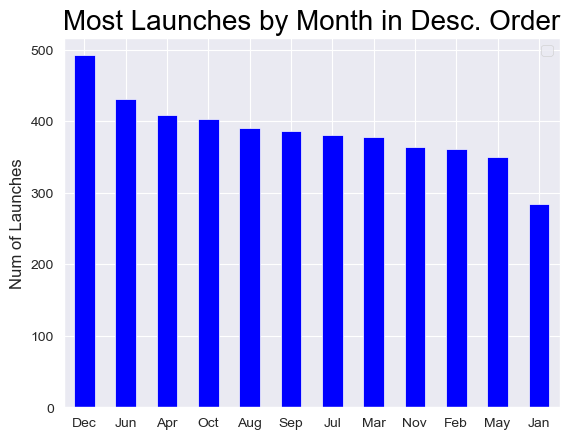

In [29]:
rl_trend_month.sort_values(by="Total Launches",
                           ascending=False).plot(kind="bar",
                                                 y="Total Launches",
                                                 x="Launch Month",
                                                 rot=0,
                                                 color="blue")
plt.title("Most Launches by Month in Desc. Order", 
          color="black", 
          fontsize=20)
plt.legend("")
plt.ylabel("Num of Launches")
plt.xlabel("")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
           ["Dec", "Jun", "Apr", "Oct", "Aug", "Sep", "Jul", "Mar", "Nov", "Feb", "May", "Jan"])
print("Bar graph visual representing the most launches by month in descending order!")

2) Has mission success rate increased?

###### Success Rate by Year

So first I will create a dataframe displaying the number of successful launches by year.

In [30]:
mission_success_rate_year = space_missions[space_missions["MissionStatus"] == "Success"].groupby(["Year", "MissionStatus"])["Company"].count().reset_index()
mission_success_rate_year.rename(columns={"Year": "Launch Year", "Company": "Total Launches","MissionStatus": "Status"}, inplace=True)
mission_success_rate_year

,Launch Year,Status,Total Launches
0,1957,Success,2
1,1958,Success,6
2,1959,Success,8
3,1960,Success,19
4,1961,Success,32
5,1962,Success,65
6,1963,Success,29
7,1964,Success,48
8,1965,Success,74
9,1966,Success,81


Now I will create a dataframe that displays the number of unsuccessful launches by year.

In [31]:
mission_failure_rate_year = space_missions[space_missions["MissionStatus"] == "Failure"].groupby(["Year", "MissionStatus"])["Company"].count().reset_index()
mission_failure_rate_year.rename(columns={"Year": "Launch Year", "Company": "Total Launches", "MissionStatus": "Status"}, inplace=True)
mission_failure_rate_year

,Launch Year,Status,Total Launches
0,1957,Failure,1
1,1958,Failure,20
2,1959,Failure,9
3,1960,Failure,20
4,1961,Failure,17
5,1962,Failure,15
6,1963,Failure,12
7,1964,Failure,10
8,1965,Failure,11
9,1966,Failure,10


Now I will join both dataframes so we can see a side by side comparison of the results.

In [32]:
mission_rates_year = pd.merge(mission_success_rate_year, mission_failure_rate_year, how="inner", on="Launch Year")
mission_rates_year.rename(columns={"Status_x": "Status_S",
                              "Total Launches_x": "Total Launches_S",
                              "Status_y": "Status_F",
                              "Total Launches_y": "Total Launches_F"}, inplace=True)
mission_rates_year

,Launch Year,Status_S,Total Launches_S,Status_F,Total Launches_F
0,1957,Success,2,Failure,1
1,1958,Success,6,Failure,20
2,1959,Success,8,Failure,9
3,1960,Success,19,Failure,20
4,1961,Success,32,Failure,17
5,1962,Success,65,Failure,15
6,1963,Success,29,Failure,12
7,1964,Success,48,Failure,10
8,1965,Success,74,Failure,11
9,1966,Success,81,Failure,10


According to the data, mission success has increased overall every year with the exception of the 1958 through 1960.

I will now build a graphic to get a visual representation of the story the data has to tell.

Scatter plot visualization of successful vs failed launches by year!


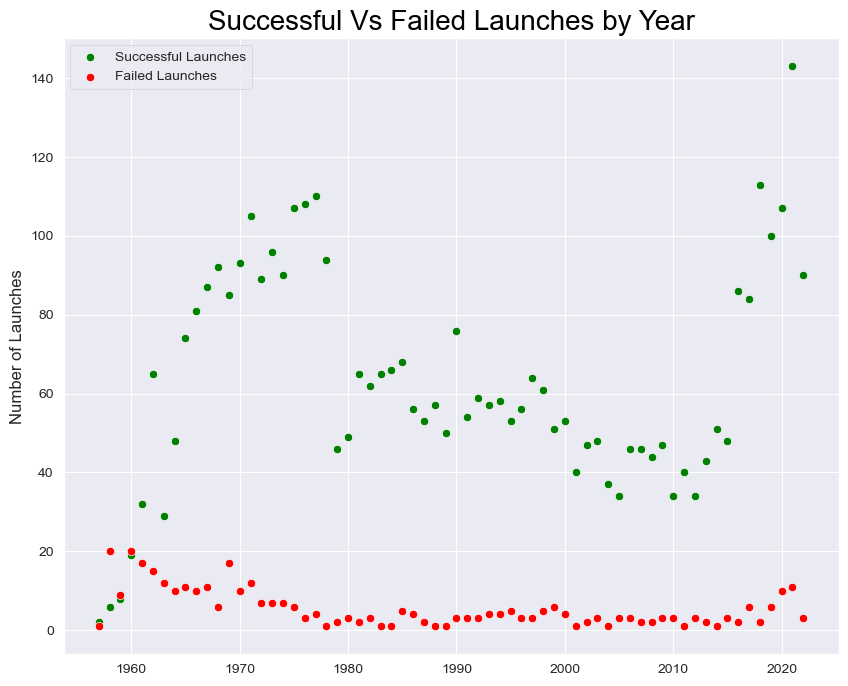

In [33]:
l = ["Successful Launches", "Failed Launches"]
plt.figure(figsize=(10,8))
sns.scatterplot(data=mission_rates_year, y="Total Launches_S", x="Launch Year", color="green")
sns.scatterplot(data=mission_rates_year, y="Total Launches_F", x="Launch Year", color="red")
plt.title("Successful Vs Failed Launches by Year", fontsize=20, color="black")
plt.legend(l)
plt.ylabel("Number of Launches")
plt.xlabel("")
print("Scatter plot visualization of successful vs failed launches by year!")


Mission success rates has increased over the years. The visualization clearly shows that the successful launches outnumbered failed launches from the years 1961 through 2022. 

I will now take a look at mission success by month.

###### Success Rate by Month

I will also look at mission success rate by month. To do this I will first create a dataframe that returns the number of successful mission launches by month.

In [34]:
mission_success_rate_month = space_missions[space_missions["MissionStatus"] == "Success"].groupby(["Month", "MissionStatus"])["Company"].count().reset_index()
mission_success_rate_month.rename(columns={"Month": "Launch Month", "Company": "Total Launches","MissionStatus": "Status"}, inplace=True)
mission_success_rate_month

,Launch Month,Status,Total Launches
0,1,Success,257
1,2,Success,321
2,3,Success,345
3,4,Success,370
4,5,Success,317
5,6,Success,385
6,7,Success,343
7,8,Success,346
8,9,Success,345
9,10,Success,367


I will now create a dataframe to return the number of unsuccessful mission launches by month.

In [35]:
mission_failure_rate_month = space_missions[space_missions["MissionStatus"] == "Failure"].groupby(["Month", "MissionStatus"])["Company"].count().reset_index()
mission_failure_rate_month.rename(columns={"Month": "Launch Month", "Company": "Total Launches", "MissionStatus": "Status"}, inplace=True)
mission_failure_rate_month

,Launch Month,Status,Total Launches
0,1,Failure,19
1,2,Failure,32
2,3,Failure,26
3,4,Failure,31
4,5,Failure,27
5,6,Failure,36
6,7,Failure,29
7,8,Failure,35
8,9,Failure,31
9,10,Failure,29


I will now take the two dataframes that I created and join them to make comparisons.

In [36]:
mission_rates_month = pd.merge(mission_success_rate_month, mission_failure_rate_month, how="inner", on="Launch Month")
mission_rates_month.rename(columns={"Status_x": "Status_S",
                              "Total Launches_x": "Total Launches_S",
                              "Status_y": "Status_F",
                              "Total Launches_y": "Total Launches_F"}, inplace=True)
mission_rates_month

,Launch Month,Status_S,Total Launches_S,Status_F,Total Launches_F
0,1,Success,257,Failure,19
1,2,Success,321,Failure,32
2,3,Success,345,Failure,26
3,4,Success,370,Failure,31
4,5,Success,317,Failure,27
5,6,Success,385,Failure,36
6,7,Success,343,Failure,29
7,8,Success,346,Failure,35
8,9,Success,345,Failure,31
9,10,Success,367,Failure,29


The data indicates that the highest number of mission success was in the month of December, and the highest number of mission failures was in the month of June.

I will now build a graphic to visualize those results.

Line graph visualization of successful vs failed launches by month!


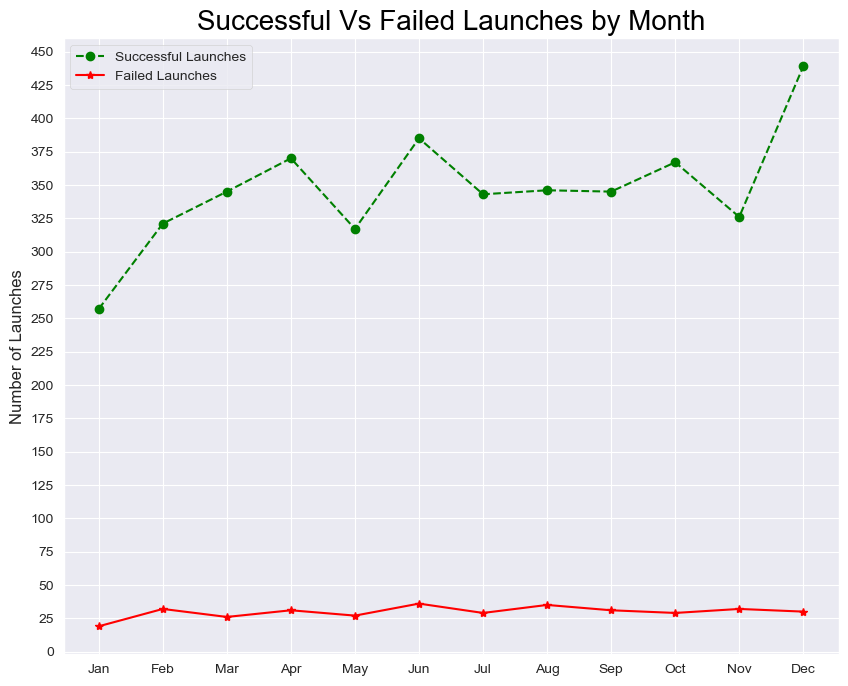

In [37]:
l = ["Successful Launches", "Failed Launches"]
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(mission_rates_month["Launch Month"], mission_rates_month["Total Launches_S"], c="green", linestyle="--", marker="o", label="line with marker")
ax.plot(mission_rates_month["Launch Month"], mission_rates_month["Total Launches_F"], c="red", marker="*", label="line with marker")
plt.title("Successful Vs Failed Launches by Month", fontsize=20, color="black")
plt.legend(l)
nol = list(range(0,475,25))
plt.yticks(nol, [f"{n}" for n in nol])
plt.ylabel("Number of Launches")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("")
print("Line graph visualization of successful vs failed launches by month!")

Above is another look at how mission success rates has increased by month starting at the month of January through April. The number of successful launches drops during May and peaks again in June. From July to September the number of successful launches remains steady and then rises slightly during the month of October. During November the number of successful launches drops slightly again, and finally peaks during the month of December. 

3) Which countries have had the most successful space missions?

To answer this question, I will create a variable for each country based off a line of code that filters two different columns and counts the distinct values for those conditions.

In [43]:
usa = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("USA"))].Location.nunique()
china = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("China"))].Location.nunique()
kaz = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Kazakhstan"))].Location.nunique()
india = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("India"))].Location.nunique()
russia = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Russia"))].Location.nunique()
skorea = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("South Korea"))].Location.nunique()
kenya = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Kenya"))].Location.nunique()
iran = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Iran"))].Location.nunique()
japan = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Japan"))].Location.nunique()
nkorea = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("North Korea"))].Location.nunique()
france = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("France"))].Location.nunique()
brazil = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Brazil"))].Location.nunique()
newzealand = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("New Zealand"))].Location.nunique()
israel = space_missions.loc[(space_missions["MissionStatus"] == "Success") & (space_missions["Location"].str.contains("Israel"))].Location.nunique()

Now I will create a dictionary with a list of the countries and the count of their successful space missions displaying in descending order.

In [47]:
successful_space_missions = pd.DataFrame({"Countries": ["USA", "China", "Kazakhstan", "India", "Russia", "South Korea", "Kenya", "Iran", "Japan", "North Korea", "France", "Brazil", "New Zealand", "Israel"],
                                          "Successful Missions": [usa, china, kaz, india, russia, skorea, kenya, iran, japan, nkorea, france, brazil, newzealand, israel]})
successful_space_missions.sort_values(by="Successful Missions", ascending=False).reset_index()

,index,Countries,Successful Missions
0,0,USA,60
1,2,Kazakhstan,19
2,4,Russia,17
3,1,China,16
4,10,France,8
5,8,Japan,5
6,3,India,3
7,12,New Zealand,3
8,5,South Korea,2
9,6,Kenya,2


The data shows us that America has had the most successful space missions with a total of 60. Kazakhstan follows with 19 successful space missions, while Russia is behind that with 17 successful space missions. After Russia, China has 16 successful space missions and every other country afterwards does not have over 8 successful space missions. 

I will visualize that in a bar graph.

America has the most successful missions by country!


<Figure size 1000x800 with 0 Axes>

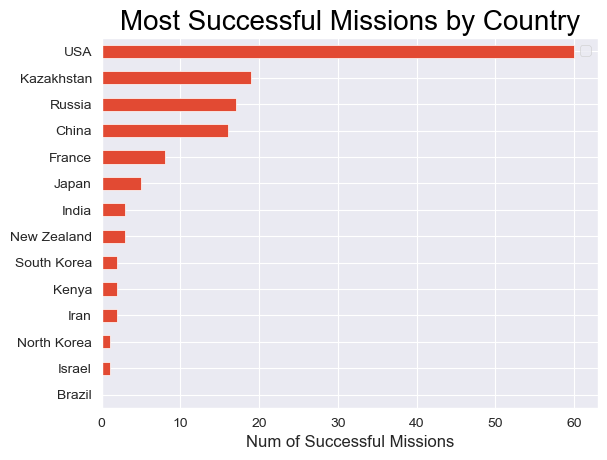

In [63]:
plt.figure(figsize=(10,8))
successful_space_missions.sort_values(by="Successful Missions", ascending=True).plot(kind="barh")
plt.title("Most Successful Missions by Country", color="black", fontsize=20)
plt.legend("")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],
           ["Brazil", "Israel", "North Korea", "Iran", "Kenya", "South Korea", "New Zealand",  "India",  "Japan",  "France",  "China",  "Russia",  "Kazakhstan", "USA"])
plt.xlabel("Num of Successful Missions")
print("America has the most successful missions by country!")

4) Which rocket has been used for the most space missions?

In [95]:
most_mission_rocket = space_missions.groupby("Rocket").Rocket.agg(["unique", "count"]).sort_values(by="count", ascending=False)[:1].reset_index()
most_mission_rocket[["Rocket", "count"]]


,Rocket,count
0,Cosmos-3M (11K65M),446


The rocket Cosmos-3M (11K65M) has been used for the most space missions.

5) Is it still active?

In [97]:
active_mission_rocket = space_missions.groupby(["Rocket", "RocketStatus"]).Rocket.agg(["unique", "count"]).sort_values(by="count", ascending=False)[:1].reset_index()
active_mission_rocket[["Rocket", "RocketStatus", "count"]]

,Rocket,RocketStatus,count
0,Cosmos-3M (11K65M),Retired,446


The data indicates that the rocket Cosmos-3M (11K65M) is no longer active, it has been retired.

This concludes my analysis on this project. I have demonstrated how to use Python to utilize libraries such as pandas to read a csv file into a dataframe, create a dataframe, manipulate and transform rows and columns in a dataframe, to merge multiple dataframes and to extract the year and months from columns for detailed analysis. I've demonstrated how to utilize the matplotlib and seaborn libraries to build and create different visuals in the form of graphs to tell the story of the data. Utilizing my skills and knowledge of Python, I have been able to successfully answer the desired questions.